<a href="https://colab.research.google.com/github/v3dant21/stock-prediction-/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,16-FEB-2024,22020.30,22068.65,21968.95,22040.70,343892935.0,30666.89
1,19-FEB-2024,22103.45,22186.65,22021.05,22122.25,218252325.0,21375.71
2,20-FEB-2024,22099.20,22215.60,22045.85,22196.95,295705319.0,26872.32
3,21-FEB-2024,22248.85,22249.40,21997.95,22055.05,364545679.0,29741.39
4,22-FEB-2024,22081.55,22252.50,21875.25,22217.45,343495136.0,33985.94


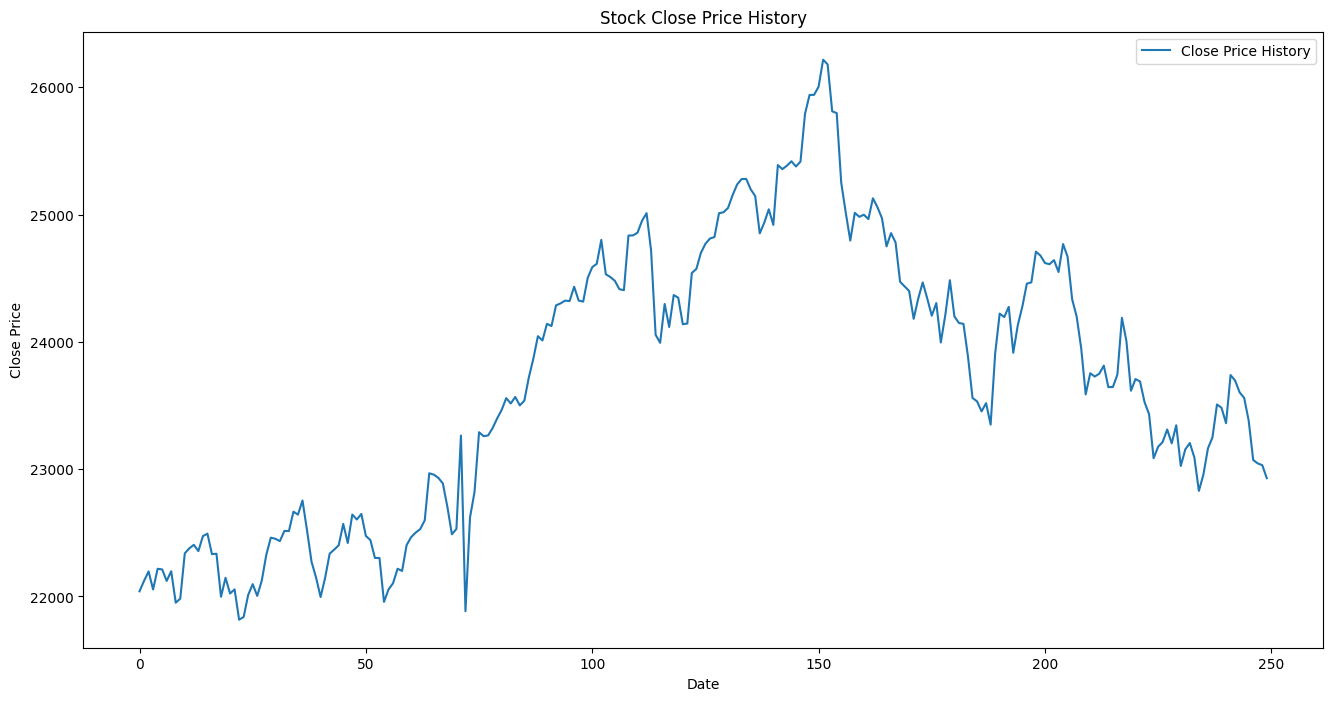

In [ ]:
 # Assuming your date column is named 'Date'
date_column = 'Date'  # Define the date column

if date_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column])
    df.set_index(date_column, inplace=True)  # Set Date as index

# Plot Close Price History
plt.figure(figsize=(16, 8))
plt.plot(df["Close "], label='Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price History')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

data = df.sort_index(ascending=True)

new_dataset = pd.DataFrame(index=range(len(df)), columns=['Date', 'Close'])

new_dataset["Date"] = data.index
new_dataset["Close "] = data["Close "].values

new_dataset.reset_index(drop=True, inplace=True)

print(new_dataset.head())


   Date Close    Close 
0     0   NaN  22040.70
1     1   NaN  22122.25
2     2   NaN  22196.95
3     3   NaN  22055.05
4     4   NaN  22217.45


In [ ]:
df.fillna(0, inplace=True)  # Replace NaNs with 0


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
final_dataset = new_dataset.values

train_data = final_dataset[0:987,:]
valid_data = final_dataset[987:,:]

new_dataset.index = new_dataset.index
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []
for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i, 0])
    y_train_data.append(scaled_data[i, 0])
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

new_dataset.rename(columns={'Date ': 'Close'}, inplace=True)

input_data = new_dataset[len(new_dataset)-len(valid_data)-60:][['Close']].values
input_data = input_data.reshape(-1, 1)
input_data = scaler.transform(final_dataset)

x_train_data = x_train_data.reshape((x_train_data.shape[0], x_train_data.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=20, batch_size=1, verbose=2)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


190/190 - 8s - 40ms/step - loss: 0.0137
Epoch 2/20
190/190 - 6s - 30ms/step - loss: 8.4644e-06
Epoch 3/20
190/190 - 4s - 22ms/step - loss: 1.1409e-05
Epoch 4/20
190/190 - 5s - 27ms/step - loss: 2.1713e-05
Epoch 5/20
190/190 - 6s - 29ms/step - loss: 9.0919e-05
Epoch 6/20
190/190 - 10s - 54ms/step - loss: 1.8558e-05
Epoch 7/20
190/190 - 9s - 47ms/step - loss: 9.5918e-05
Epoch 8/20
190/190 - 6s - 33ms/step - loss: 3.1859e-05
Epoch 9/20
190/190 - 10s - 54ms/step - loss: 9.1583e-05
Epoch 10/20
190/190 - 9s - 48ms/step - loss: 5.1258e-05
Epoch 11/20
190/190 - 7s - 39ms/step - loss: 2.2395e-04
Epoch 12/20
190/190 - 4s - 23ms/step - loss: 5.0646e-04
Epoch 13/20
190/190 - 6s - 34ms/step - loss: 3.6609e-05
Epoch 14/20
190/190 - 9s - 47ms/step - loss: 2.3128e-05
Epoch 15/20
190/190 - 6s - 29ms/step - loss: 2.0770e-04
Epoch 16/20
190/190 - 10s - 52ms/step - loss: 2.2787e-05
Epoch 17/20
190/190 - 5s - 24ms/step - loss: 2.0056e-04
Epoch 18/20
190/190 - 4s - 23ms/step - loss: 4.6324e-05
Epoch 19/20
1

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(new_dataset)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


190/190 - 8s - 44ms/step - loss: 0.0117


In [ ]:
predicted_closing_price = predicted_closing_price.reshape(-1, 1)

temp_array = np.zeros((predicted_closing_price.shape[0], final_dataset.shape[1]))
temp_array[:, 0] = predicted_closing_price[:, 0]

predicted_closing_price = scaler.inverse_transform(temp_array)[:, 0]


NameError: name 'predicted_closing_price' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

close_scaler = MinMaxScaler()
scaled_close = close_scaler.fit_transform(inputs_data[:, [0]])

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_closing_price = lstm_model.predict(X_test)

predicted_closing_price = close_scaler.inverse_transform(predicted_closing_price)
lstm_model.save("saved_model.h5")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
train_data = new_dataset[:987]
valid_data = new_dataset[987:]
valid_data['Predictions'] = predicted_closing_price

plt.plot(train_data["Close"])
plt.plot(valid_data[['Close', "Predictions"]])

NameError: name 'new_dataset' is not defined

In [9]:
import os

# Set up Git credentials (if not already set)
!git config --global user.email "vedantsharmaa.211103@gmail.com"
!git config --global user.name "v3dant21"

# Define repository name and directory
repo_name = "stock-prediction"
repo_dir = repo_name  # Or a different directory name if you prefer

# Check if the directory already exists and remove it if necessary
if os.path.exists(repo_dir) and os.path.isdir(repo_dir):
    !rm -rf {repo_dir}

# Clone your GitHub repository
!git clone https://github.com/v3dant21/{repo_name}.git {repo_dir}

# Assuming your notebook is named 'stock-prediction.ipynb'
notebook_file = "stock-prediction.ipynb"

# Move the notebook into the cloned repo
!mv {notebook_file} {repo_dir}/

# Change directory to the repo
%cd {repo_dir}/

# Add, commit, and push the file
!git add .
!git commit -m "Initial commit with stock prediction model"
!git push origin main  # or 'master' if your main branch is named 'master'

Cloning into 'stock-prediction'...
fatal: could not read Username for 'https://github.com': No such device or address
mv: cannot stat 'stock-prediction.ipynb': No such file or directory
[Errno 2] No such file or directory: 'stock-prediction/'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
